# Forest Fire Detection

Importing required packages

In [1]:
import tensorflow as tf
from pathlib import Path
import numpy  # linear algebra
import pandas  # data processing
import cv2  # Image processing
import glob
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

Load Dataset

In [2]:
fire_image_path ="/home/studio-lab-user/forestFire/dataset/train/fire"
non_fire_image_path ="/home/studio-lab-user/forestFire/dataset/train/nofire"
fire_image_path = Path(fire_image_path)
non_fire_path = Path(non_fire_image_path)

In [3]:
train_data_images = {
    "Fire":list(fire_image_path.glob("*.jpg")),
    "NonFire":list(non_fire_path.glob("*.jpg"))
}

In [4]:
train_labels = {
    "Fire":0,"NonFire":1
}

Preprocess Images and labels

In [5]:
X, y = [], []
for label, images in train_data_images.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the image
        if img is not None:
            img = cv2.resize(img, (180, 180))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(train_labels[label])

In [6]:
import numpy
X_samp = numpy.array(X)
y_samp = numpy.array(y)
X_samp = X_samp/255 #Noramlize the image

Split the Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.1)

#Data agumentation to increase sample data 
data_augumentation = keras.Sequential([
    keras.layers.RandomContrast(0.1),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.5),
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


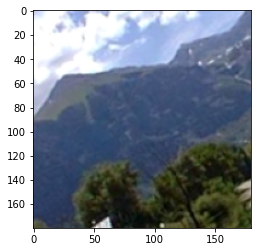

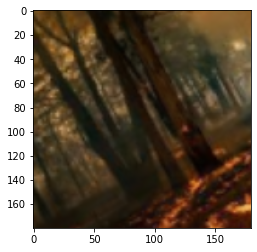

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


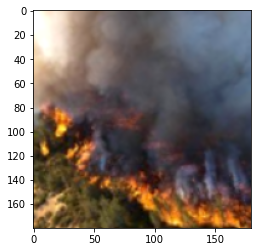

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


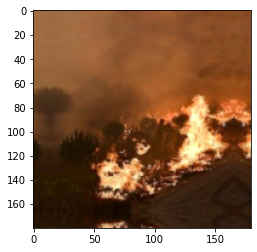

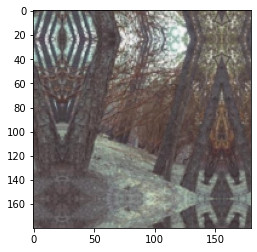

In [8]:
#Examples of Augumented data
for i in range(5):
    plt.imshow(data_augumentation(X_train[i]))
    plt.show()

Model

In [9]:
model = keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(64, (3,3), padding='same', activation="relu", input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), padding='same', activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16, (3,3), padding='same', activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=50)
model.evaluate(X_test, y_test)

2022-02-06 13:17:02.084639: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 640742400 exceeds 10% of free system memory.
2022-02-06 13:17:02.720336: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 640742400 exceeds 10% of free system memory.


Epoch 1/50
52/52 [==============================] - 6s 42ms/step - loss: 0.3622 - accuracy: 0.8550
Epoch 2/50
52/52 [==============================] - 2s 37ms/step - loss: 0.2454 - accuracy: 0.9223
Epoch 3/50
52/52 [==============================] - 2s 37ms/step - loss: 0.2225 - accuracy: 0.9314
Epoch 4/50
52/52 [==============================] - 2s 37ms/step - loss: 0.2023 - accuracy: 0.9363
Epoch 5/50
52/52 [==============================] - 2s 37ms/step - loss: 0.1797 - accuracy: 0.9454
Epoch 6/50
52/52 [==============================] - 2s 37ms/step - loss: 0.1694 - accuracy: 0.9502
Epoch 7/50
52/52 [==============================] - 2s 37ms/step - loss: 0.1578 - accuracy: 0.9521
Epoch 8/50
52/52 [==============================] - 2s 37ms/step - loss: 0.1542 - accuracy: 0.9490
Epoch 9/50
52/52 [==============================] - 2s 37ms/step - loss: 0.1564 - accuracy: 0.9515
Epoch 10/50
52/52 [==============================] - 2s 37ms/step - loss: 0.1471 - accuracy: 0.9527
Epoch 11/

[0.11165475845336914, 0.967391312122345]

Load test Dataset

In [10]:
test_fire_path = "/home/studio-lab-user/forestFire/dataset/test/fire"
test_non_fire_path = "/home/studio-lab-user/forestFire/dataset/test/nofire"
test_fire_path = Path(test_fire_path)
test_non_fire_path= Path(test_non_fire_path)

In [11]:
test = {
    "Fire":list(test_fire_path.glob("*.jpg")),
    "NonFire":list(test_non_fire_path.glob("*.jpg"))
}

In [12]:
#Preprocess images
test_array = []
for label, images in test.items():
    for image in images:
        img = cv2.imread(str(image)) # Reading the test image
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (180, 180))
            test_array.append(img)
test_array = numpy.array(test_array)
test_array = test_array/ 255

In [13]:
#Predict the images
prediction = model.predict(test_array)

In [14]:
preds = prediction.round(decimals=0).flatten()
results = []
for i in preds:
    if i==0:
        results.append("Fire")
    elif i == 1:
        results.append("Non Fire")

In [15]:
#Print prediction results
fire = 0
nonFire = 0
for i in results:
    if i=="Fire":
        fire += 1
    else:
        nonFire += 1
print(fire, "Fire images out of ", len(results))
print(nonFire , 'Non fire images out of', len(results))

22 Fire images out of  68
46 Non fire images out of 68


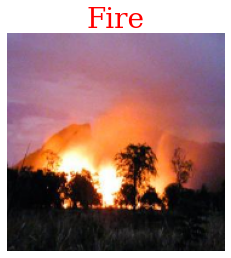

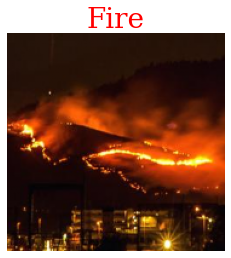

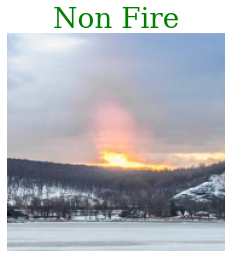

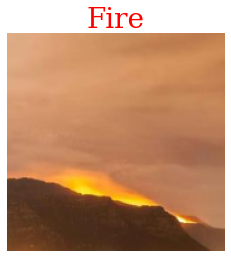

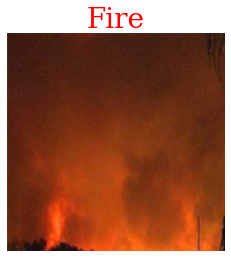

In [16]:
#Display few prediction result
font = [{'family':'serif','color':'green','size':28},{'family':'serif','color':'red','size':28}] 
for i in range(5):
    plt.imshow(test_array[i])
    plt.title(results[i], fontdict= font[1] if results[i]=='Fire' else font[0])
    plt.axis('off')
    plt.show()

Save the Model

In [17]:
model.save('Forest_fire_model.h5')
model.save_weights('./training1/weights')